In [2]:
from utilities import TimeSeries
from technical_indicators import calculate_bollinger_bands, calculate_adx, calculate_rsi, calculate_rolling_std, calculate_rolling_mean

# Raw Time Series Data

## Data
We source the data for UBS' (ticker representing Union Bank of Switzerland). The time series, ACF and PACF plots are shown below.

### Feature Engineering
We will construct technical indicators and use them as features to train the model. The technical indicators include:
- Bollinger Bands
- Relative Strength Index (RSI)
- Average Directional Index (ADX)
- Rolling Standard Deviation
- Rolling Mean
- Returns
- Lagged Close Price
- Profiltability (Returns > 0.0 )


Finally, we convert the data and clean it to be used in the model.

In [6]:
ubs = TimeSeries('UBS')
ubs.construct_technical_indicators(
    [
        calculate_bollinger_bands,
        calculate_rsi,
        calculate_adx,
        calculate_rolling_std,
        calculate_rolling_mean,
    ],
    [40, 80, 120, 150],
).construct_returns()\
.profitability("Returns", 0.0)\
.lag_column('Close',7, 100)\
.clean_data_and_prepare_for_training(target="Close")


[*********************100%%**********************]  1 of 1 completed


In [12]:
ubs.data

,Close,BollingerBand_40,BollingerBand_80,BollingerBand_120,BollingerBand_150,RSI_40,RSI_80,RSI_120,RSI_150,ADX_40,...,Close_lag91,Close_lag92,Close_lag93,Close_lag94,Close_lag95,Close_lag96,Close_lag97,Close_lag98,Close_lag99,Close_lag100
298,18.549999,2,2,2,2,45.376075,55.780780,54.948806,52.468535,26.983415,...,17.010000,17.120001,17.280001,17.410000,17.330000,17.430000,17.309999,17.260000,17.240000,17.280001
299,18.230000,2,2,2,2,41.646179,54.472140,53.629711,51.791687,26.363823,...,16.920000,17.010000,17.120001,17.280001,17.410000,17.330000,17.430000,17.309999,17.260000,17.240000
300,18.200001,2,2,2,2,42.374995,54.472148,53.690146,52.341867,25.627388,...,17.010000,16.920000,17.010000,17.120001,17.280001,17.410000,17.330000,17.430000,17.309999,17.260000
301,18.389999,2,2,2,2,43.296423,54.869190,54.001122,52.593661,24.945015,...,16.900000,17.010000,16.920000,17.010000,17.120001,17.280001,17.410000,17.330000,17.430000,17.309999
302,18.450001,2,2,2,2,41.048585,54.737616,54.103858,53.394767,24.278313,...,17.260000,16.900000,17.010000,16.920000,17.010000,17.120001,17.280001,17.410000,17.330000,17.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,27.820000,2,2,2,2,39.179959,57.183599,53.360081,56.902786,29.555162,...,24.709999,24.620001,24.590000,24.080000,23.950001,23.850000,24.360001,24.650000,24.700001,24.340000
1795,28.059999,2,2,2,2,39.272183,57.935942,53.465097,57.121692,28.823396,...,25.230000,24.709999,24.620001,24.590000,24.080000,23.950001,23.850000,24.360001,24.650000,24.700001
1796,28.049999,2,2,2,2,38.544061,58.414063,51.737552,57.218570,28.016746,...,24.790001,25.230000,24.709999,24.620001,24.590000,24.080000,23.950001,23.850000,24.360001,24.650000
1797,28.350000,2,2,2,2,39.242431,58.339326,52.611068,57.444115,27.166450,...,24.309999,24.790001,25.230000,24.709999,24.620001,24.590000,24.080000,23.950001,23.850000,24.360001


<module 'matplotlib.pyplot' from 'c:\\Users\\kumar\\miniconda3\\envs\\darn\\Lib\\site-packages\\matplotlib\\pyplot.py'>

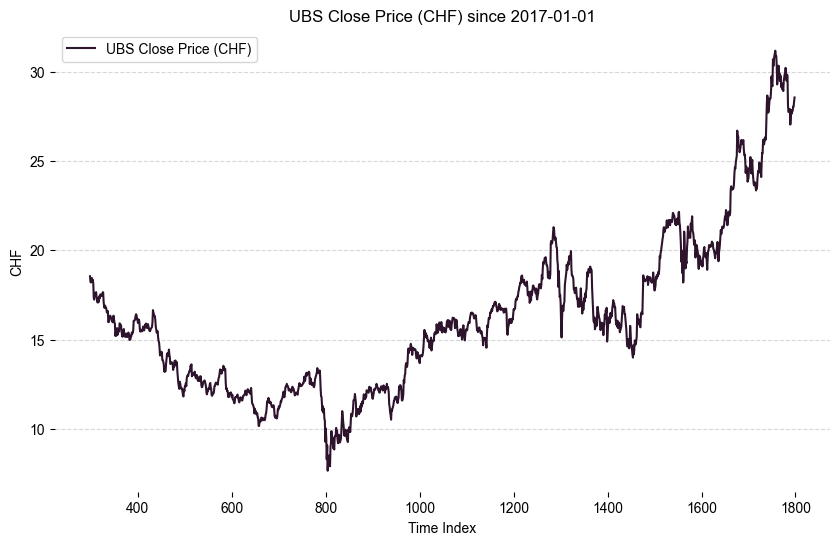

In [22]:
from visualisation import plot_smooth_multiline_chart
plot_smooth_multiline_chart([( ubs.data.index, ubs.data['Close'],'UBS Close Price (CHF)')], x_label='Time Index', y_label='CHF', title='UBS Close Price (CHF) since 2017-01-01')

c:\git\WQU\DeepLearning\utilities.py:92: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_acf_pacf_side_by_side(self.data[column], lags=max_lags).show()


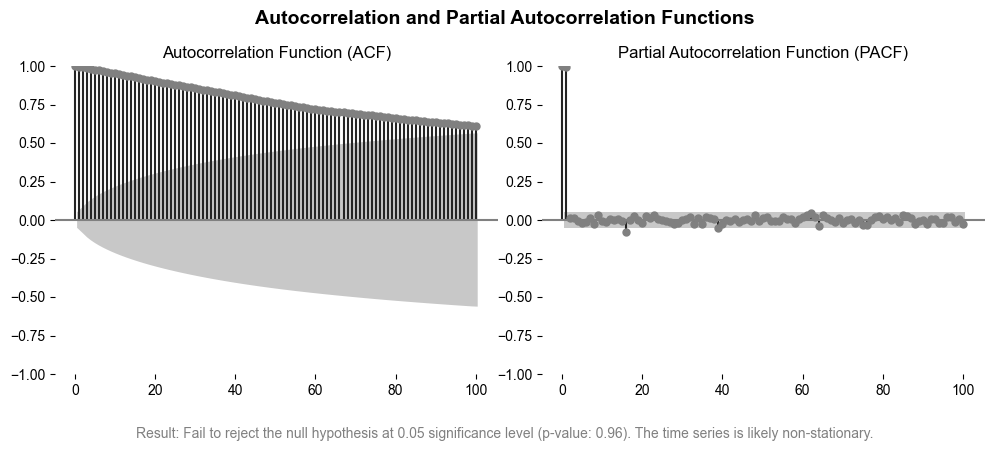

In [16]:
ubs.acf('Close', max_lags=100)

In [77]:
# Deep Learning Model
import tensorflow as tf

tf.keras.backend.clear_session()  # We clear the backend to reset the random seed process
tf.random.set_seed(142)  # We will set a random seed so that results obtained are somewhat replicable

act_fun = "linear" # Activation function
hp_units = 60 # Number of units in the first layer
hp_units_2 = 40 # Number of units in the second layer
hp_units_3 = 20 # Number of units in the third layer
n_dropout = 0.05 # Dropout rate

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=1, activation="selu"))
hp_lr = 1e-5  # Learning rate

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)  # Adam optimizer

model.compile(optimizer=adam, loss='huber', metrics=['mean_absolute_error'])

In [78]:
history = model.fit(
    ubs.training_data.x_train,
    ubs.training_data.y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=12,
    verbose=2,
)

Epoch 1/200


80/80 - 1s - loss: 14.0925 - mean_absolute_error: 14.5909 - val_loss: 18.5685 - val_mean_absolute_error: 19.0685 - 989ms/epoch - 12ms/step
Epoch 2/200
80/80 - 0s - loss: 12.0464 - mean_absolute_error: 12.5407 - val_loss: 13.1815 - val_mean_absolute_error: 13.6815 - 124ms/epoch - 2ms/step
Epoch 3/200
80/80 - 0s - loss: 10.7678 - mean_absolute_error: 11.2590 - val_loss: 14.2452 - val_mean_absolute_error: 14.7452 - 121ms/epoch - 2ms/step
Epoch 4/200
80/80 - 0s - loss: 10.6214 - mean_absolute_error: 11.1129 - val_loss: 8.7818 - val_mean_absolute_error: 9.2818 - 119ms/epoch - 1ms/step
Epoch 5/200
80/80 - 0s - loss: 10.5347 - mean_absolute_error: 11.0296 - val_loss: 11.2621 - val_mean_absolute_error: 11.7621 - 123ms/epoch - 2ms/step
Epoch 6/200
80/80 - 0s - loss: 9.8891 - mean_absolute_error: 10.3798 - val_loss: 10.8071 - val_mean_absolute_error: 11.3071 - 120ms/epoch - 1ms/step
Epoch 7/200
80/80 - 0s - loss: 10.0443 - mean_absolute_error: 10.5359 - val_loss: 8.1201 - val_mean_absolute_error

10/10 [==============================] - 0s 1ms/step


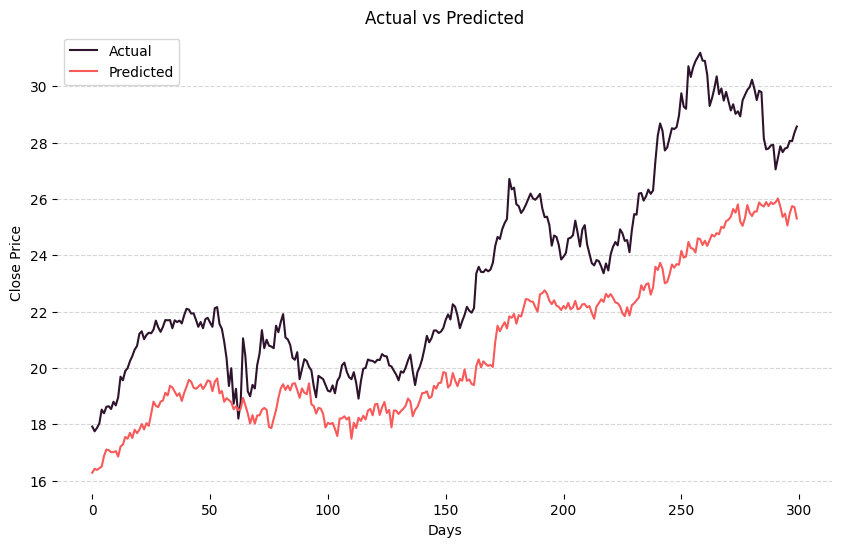

In [79]:
preds = model.predict(ubs.training_data.x_test)
from visualisation import plot_smooth_multiline_chart
plot_smooth_multiline_chart([(range(len(ubs.training_data.y_test)),ubs.training_data.y_test,  'Actual'),(range(len(preds)), preds, 'Predicted')], title='Actual vs Predicted', x_label='Days', y_label='Close Price').show()

In [ ]:
import pandas as pd
df = pd.DataFrame([ubs.training_data.y_test, preds.flatten()], index=['Actual', 'Predicted']).T
df['Actual_Return'] = df['Actual'].pct_change()
df['Predicted_Return'] = df['Predicted'].pct_change()
df['Concordance'] = df['Actual_Return'] * df['Predicted_Return'] > 0
df['Concordance'].value_counts(normalize=True)

In [34]:
stationary = TimeSeries('UBS')
stationary.construct_technical_indicators(
    [
        calculate_bollinger_bands,
        calculate_rsi,
        calculate_adx,
        calculate_rolling_std,
        calculate_rolling_mean,
    ],
    [40, 80, 120, 150],
).construct_returns()\
.lag_column("Returns",1, 5)\
.clean_data_and_prepare_for_training(target="Returns")

[*********************100%%**********************]  1 of 1 completed


c:\git\WQU\DeepLearning\utilities.py:92: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_acf_pacf_side_by_side(self.data[column], lags=max_lags).show()


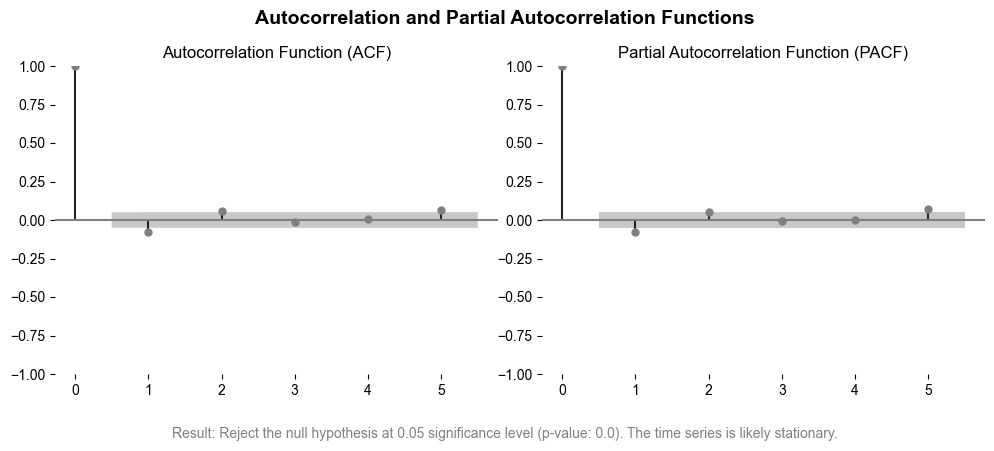

In [39]:
stationary.acf('Returns', max_lags=5)

In [35]:
# Deep Learning Model
import tensorflow as tf

tf.keras.backend.clear_session()  # We clear the backend to reset the random seed process
tf.random.set_seed(142)  # We will set a random seed so that results obtained are somewhat replicable

act_fun = "linear" # Activation function
hp_units = 60 # Number of units in the first layer
hp_units_2 = 40 # Number of units in the second layer
hp_units_3 = 20 # Number of units in the third layer
n_dropout = 0.05 # Dropout rate

model_r = tf.keras.models.Sequential()
model_r.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun))
model_r.add(tf.keras.layers.Dropout(n_dropout))
model_r.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model_r.add(tf.keras.layers.Dropout(n_dropout))
model_r.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model_r.add(tf.keras.layers.Dropout(n_dropout))
model_r.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model_r.add(tf.keras.layers.Dropout(n_dropout))
model_r.add(tf.keras.layers.Dense(units=1, activation="linear"))

hp_lr = 1e-5  # Learning rate

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)  # Adam optimizer

model_r.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])

In [37]:
history = model_r.fit(
    stationary.training_data.x_train,
    stationary.training_data.y_train,
    validation_split=0.2,
    epochs=900,
    batch_size=12,
    verbose=2,
)

Epoch 1/900


80/80 - 0s - loss: 6.9839 - mean_squared_error: 6.9839 - val_loss: 0.0924 - val_mean_squared_error: 0.0924 - 199ms/epoch - 2ms/step
Epoch 2/900
80/80 - 0s - loss: 6.6454 - mean_squared_error: 6.6454 - val_loss: 0.0661 - val_mean_squared_error: 0.0661 - 115ms/epoch - 1ms/step
Epoch 3/900
80/80 - 0s - loss: 6.7367 - mean_squared_error: 6.7367 - val_loss: 0.0559 - val_mean_squared_error: 0.0559 - 112ms/epoch - 1ms/step
Epoch 4/900
80/80 - 0s - loss: 7.5207 - mean_squared_error: 7.5207 - val_loss: 0.0572 - val_mean_squared_error: 0.0572 - 114ms/epoch - 1ms/step
Epoch 5/900
80/80 - 0s - loss: 7.1179 - mean_squared_error: 7.1179 - val_loss: 0.1294 - val_mean_squared_error: 0.1294 - 110ms/epoch - 1ms/step
Epoch 6/900
80/80 - 0s - loss: 7.8728 - mean_squared_error: 7.8728 - val_loss: 0.0595 - val_mean_squared_error: 0.0595 - 111ms/epoch - 1ms/step
Epoch 7/900
80/80 - 0s - loss: 6.3381 - mean_squared_error: 6.3381 - val_loss: 0.0878 - val_mean_squared_error: 0.0878 - 111ms/epoch - 1ms/step
Epoc

10/10 [==============================] - 0s 2ms/step


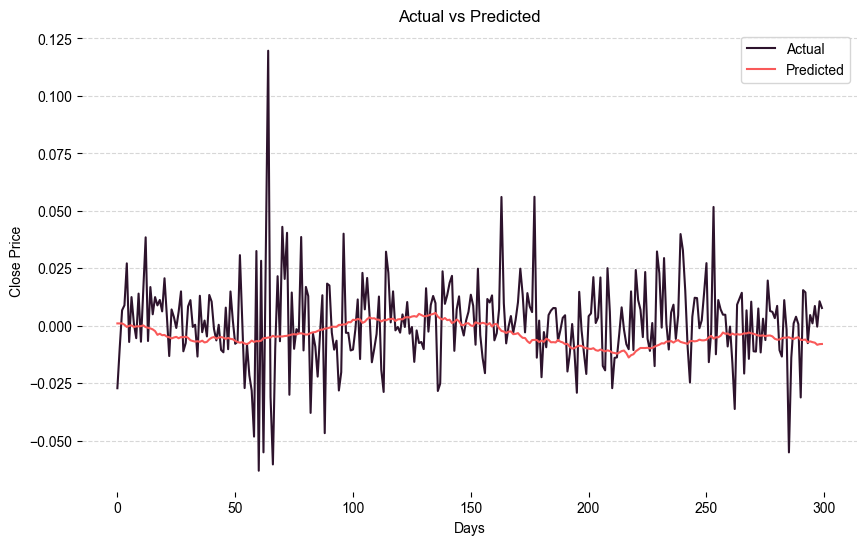

In [38]:
preds = model_r.predict(stationary.training_data.x_test)
from visualisation import plot_smooth_multiline_chart
plot_smooth_multiline_chart([(range(len(stationary.training_data.y_test)),stationary.training_data.y_test,  'Actual'),(range(len(preds)), preds, 'Predicted')], title='Actual vs Predicted', x_label='Days', y_label='Close Price').show()

# Fractional Differencing


In [25]:
from fractional_differencing import ts_differencing_tau

In [26]:
ubs = TimeSeries('UBS')
ubs.construct_technical_indicators(
    [
        calculate_bollinger_bands,
        calculate_rsi,
        calculate_adx,
        calculate_rolling_std,
        calculate_rolling_mean,
    ],
    [40, 80, 120, 150],
).construct_returns()\
.add_index()\
.profitability("Returns", 0.0)\

fractional_differenced_data, lags = ts_differencing_tau(ubs.data['Close'], 0.5, 1e-4)
ubs.data = ubs.data[lags:]
ubs.data['Fractional_Differenced_Close'] = fractional_differenced_data
ubs.data = ubs.data.drop(columns=['Close'])
ubs.clean_data_and_prepare_for_training(target="Fractional_Differenced_Close")


[*********************100%%**********************]  1 of 1 completed

Fractional differencing with d=0.5 and tau=0.0001 requires 202 lags


In [ ]:
ubs.training_data.x_train.shape

In [27]:
import numpy as np
from tensorflow import keras

# Assuming ubs.training_data.x_train.shape is (n_samples, n_features)
# Add a new axis for time steps
x_train_reshaped = np.expand_dims(ubs.training_data.x_train, axis=1)

# Now the shape will be (n_samples, 1, n_features)

inputs = keras.layers.Input(shape=(1, 23))  # Adjust the shape based on the number of features
x = keras.layers.LSTM(50, return_sequences=True)(inputs)
x = keras.layers.Dropout(0.05)(x)
x = keras.layers.LSTM(50, return_sequences=True)(x)
x = keras.layers.Dropout(0.05)(x)
x = keras.layers.LSTM(50)(x)
outputs = keras.layers.Dense(1, activation='selu')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")

In [28]:
history = model.fit(
    x_train_reshaped, ubs.training_data.y_train,
    epochs = 500,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/500

30/30 [==============================] - 4s 34ms/step - loss: 0.2986 - val_loss: 0.4399
Epoch 2/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1247 - val_loss: 0.3245
Epoch 3/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1125 - val_loss: 0.3154
Epoch 4/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1125 - val_loss: 0.3228
Epoch 5/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1103 - val_loss: 0.3152
Epoch 6/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1097 - val_loss: 0.3142
Epoch 7/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1106 - val_loss: 0.3151
Epoch 8/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1101 - val_loss: 0.3144
Epoch 9/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1114 - val_loss: 0.3200
Epoch 10/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1095 - val_loss: 0.3178
Epoch 1

In [ ]:
from sklearn.metrics import r2_score


10/10 [==============================] - 1s 2ms/step


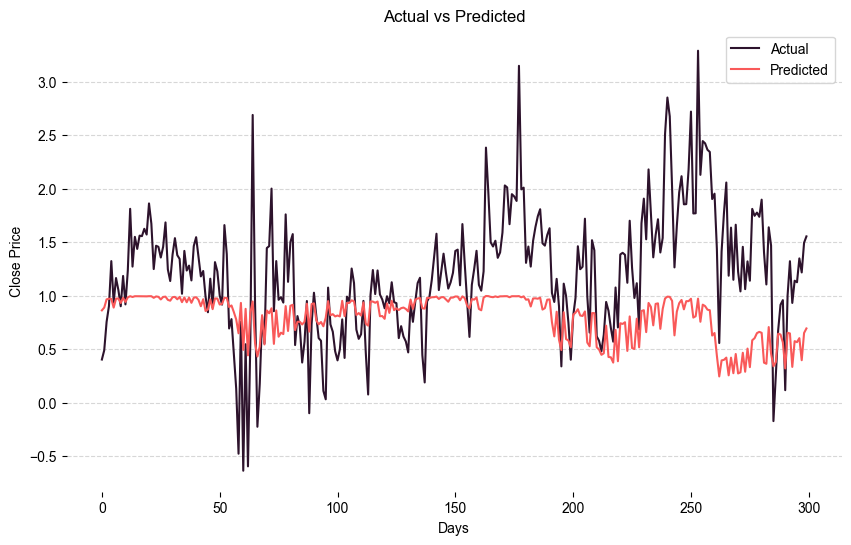

In [29]:
preds = model.predict(np.expand_dims(ubs.training_data.x_test, axis=1))
from visualisation import plot_smooth_multiline_chart
plot_smooth_multiline_chart([(range(len(ubs.training_data.y_test)),ubs.training_data.y_test,  'Actual'),(range(len(preds)), preds, 'Predicted')], title='Actual vs Predicted', x_label='Days', y_label='Close Price').show()